In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


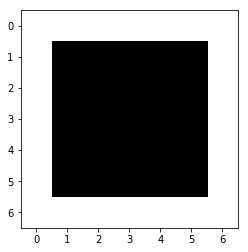

In [13]:
square = np.ones([7,7]) #padded
square[0] = 0
square[-1] = 0
square[:,0] = 0
square[:,-1] = 0
print(square)
plt.imshow(square, cmap='gray_r')
plt.show()

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


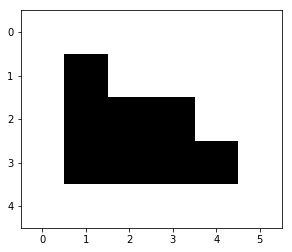

In [29]:
triangle = np.zeros([5,6])
triangle[1][1] = 1
triangle[2][1:4] = 1
triangle[3][1:5] = 1

print(triangle)
plt.imshow(triangle, cmap='gray_r')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


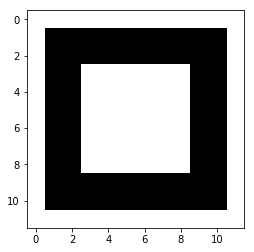

In [50]:
box = np.zeros([12,12])
box[1][1:11] = 1
box[2][1:11] = 1
box[-2][1:11] = 1
box[-3][1:11] = 1
box[1:9,1:3] = 1
box[1:9,9:11] = 1



print(box)

plt.imshow(box, cmap='gray_r')
plt.show()

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


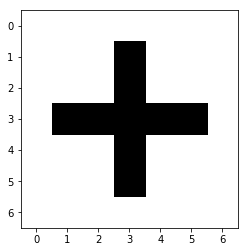

In [89]:
cross = np.zeros([7,7])
cross[1:6,3]=1
cross[3,1:6]=1

print(cross)
plt.imshow(cross, cmap='gray_r')
plt.show()

In [101]:
so1 = np.ones([2,2])
so2 = np.ones([2,1])
so3 = np.ones([1,2])
so4 = np.ones([3,3])
so4[0,0] = 0
so4[-1,-1] = 0
so4[0,-1] = 0
so4[-1,0] = 0
so4 = so4.astype(np.uint8)
so5 = np.ones([2,2])
so5[0,-1] = 0
so5[-1,0] = 0
so5 = so5.astype(np.uint8)

### Dilation

In [106]:
dilated_square = []
dilated_triangle = []
dilated_box = []
dilated_cross = []

eroded_square = []
eroded_triangle = []
eroded_box = []
eroded_cross = []


solist = [so1,so2,so3,so4,so5]
for i in solist:
    dilated_square.append(cv2.dilate(square,i, 1))
    dilated_triangle.append(cv2.dilate(triangle,i, 1))
    dilated_box.append(cv2.dilate(box,i, 1))
    dilated_cross.append(cv2.dilate(cross,i, 1))
    
    eroded_square.append(cv2.erode(square,i, 1))
    eroded_triangle.append(cv2.erode(triangle,i, 1))
    eroded_box.append(cv2.erode(box,i, 1))
    eroded_cross.append(cv2.erode(cross,i, 1))

In [107]:
object_list = [square, triangle,box,cross]

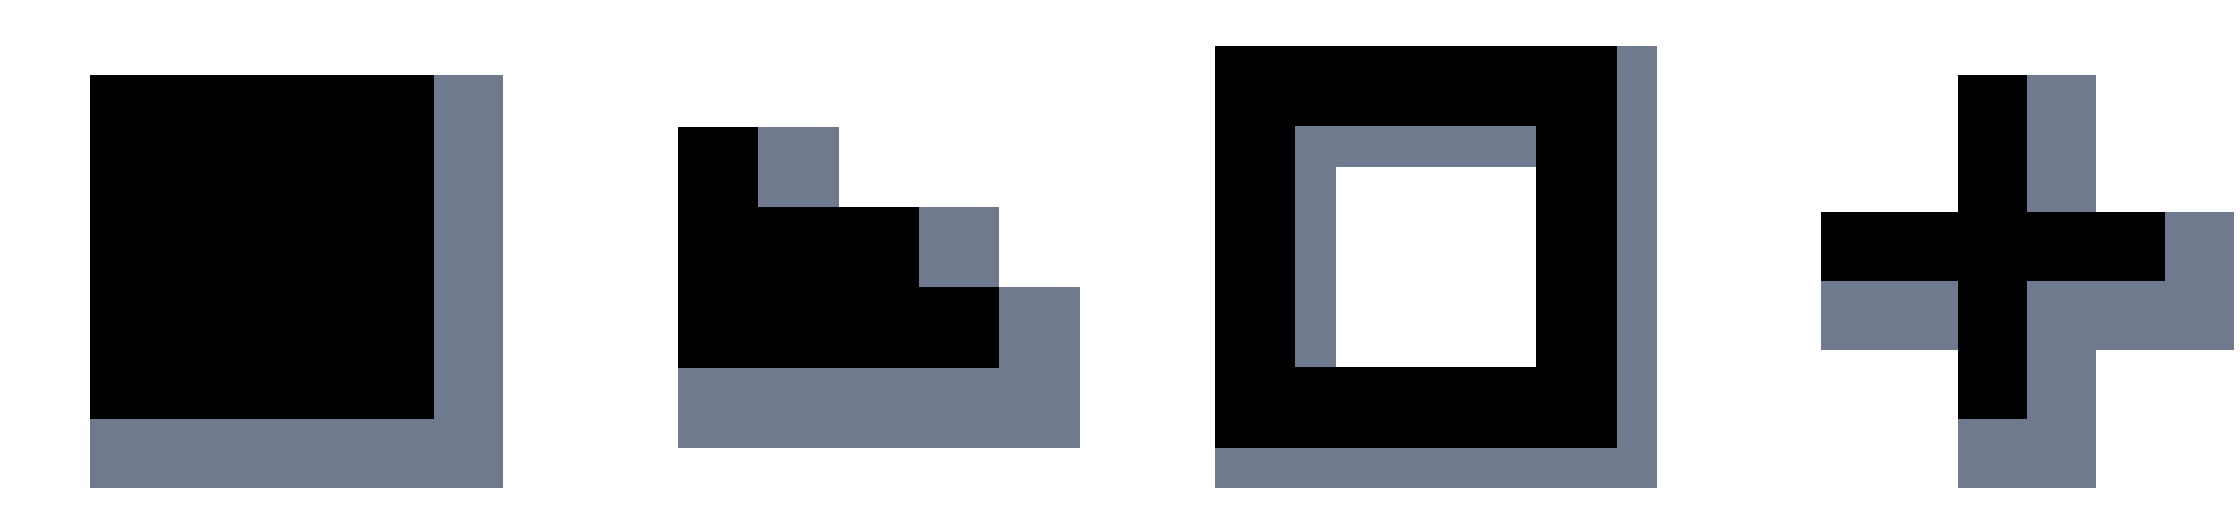

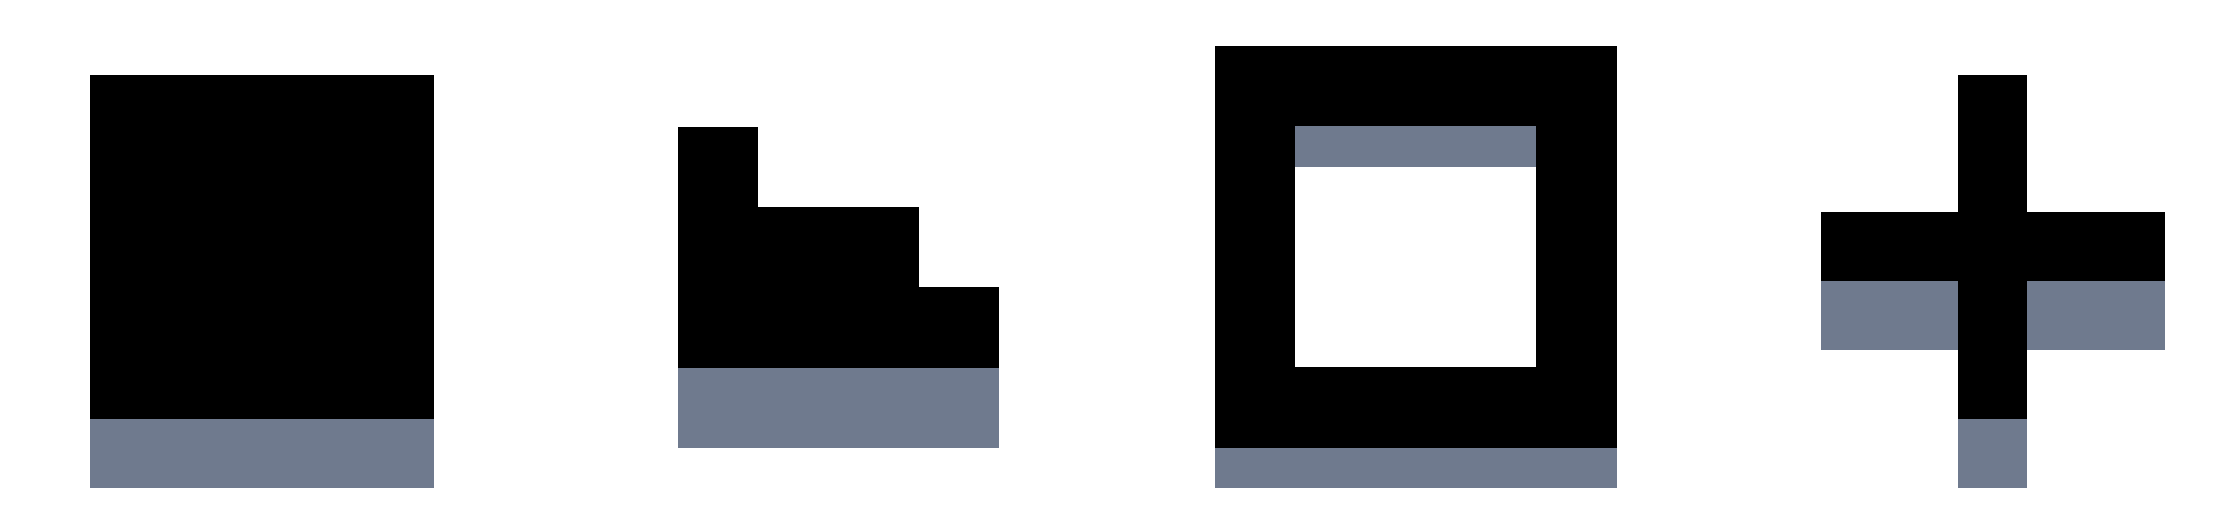

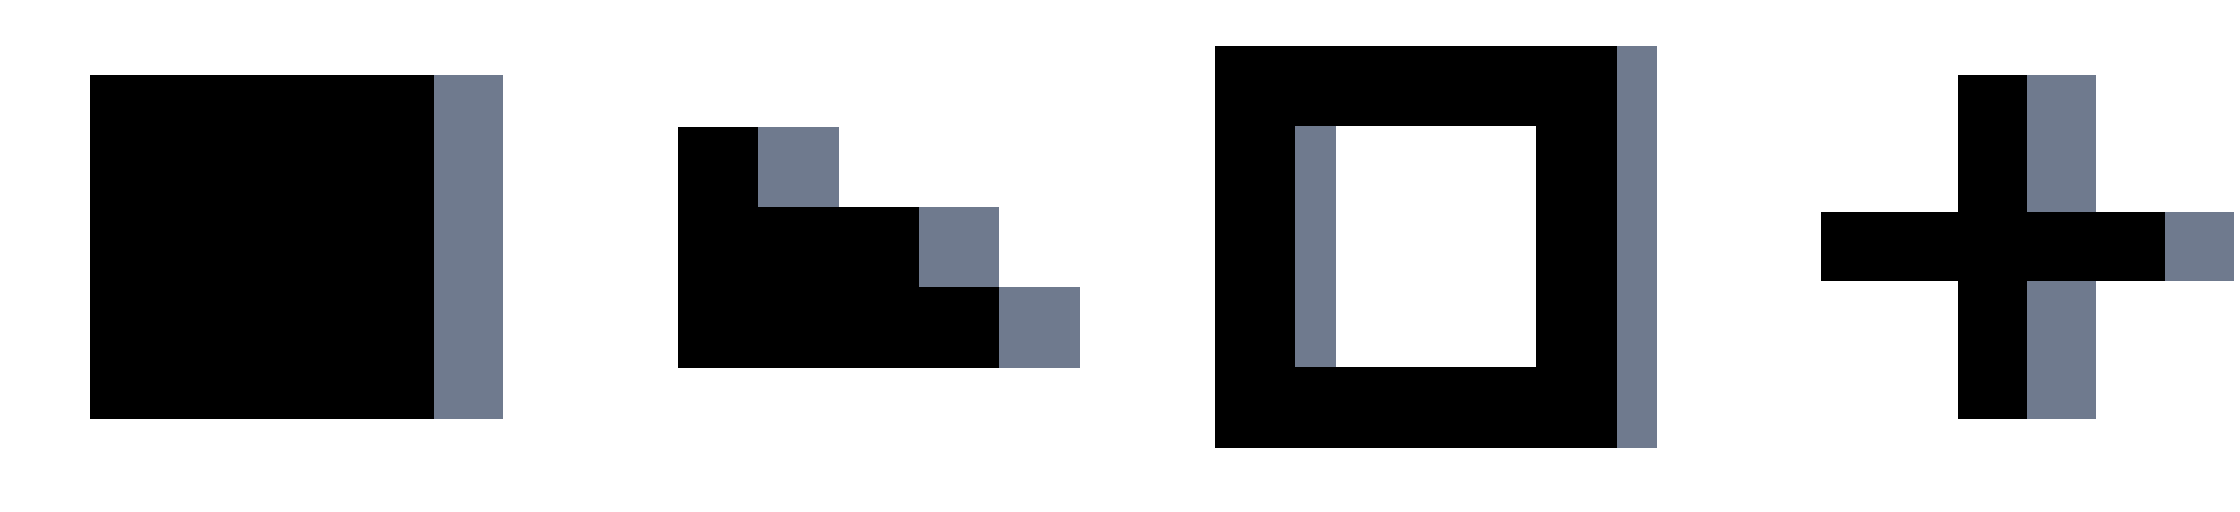

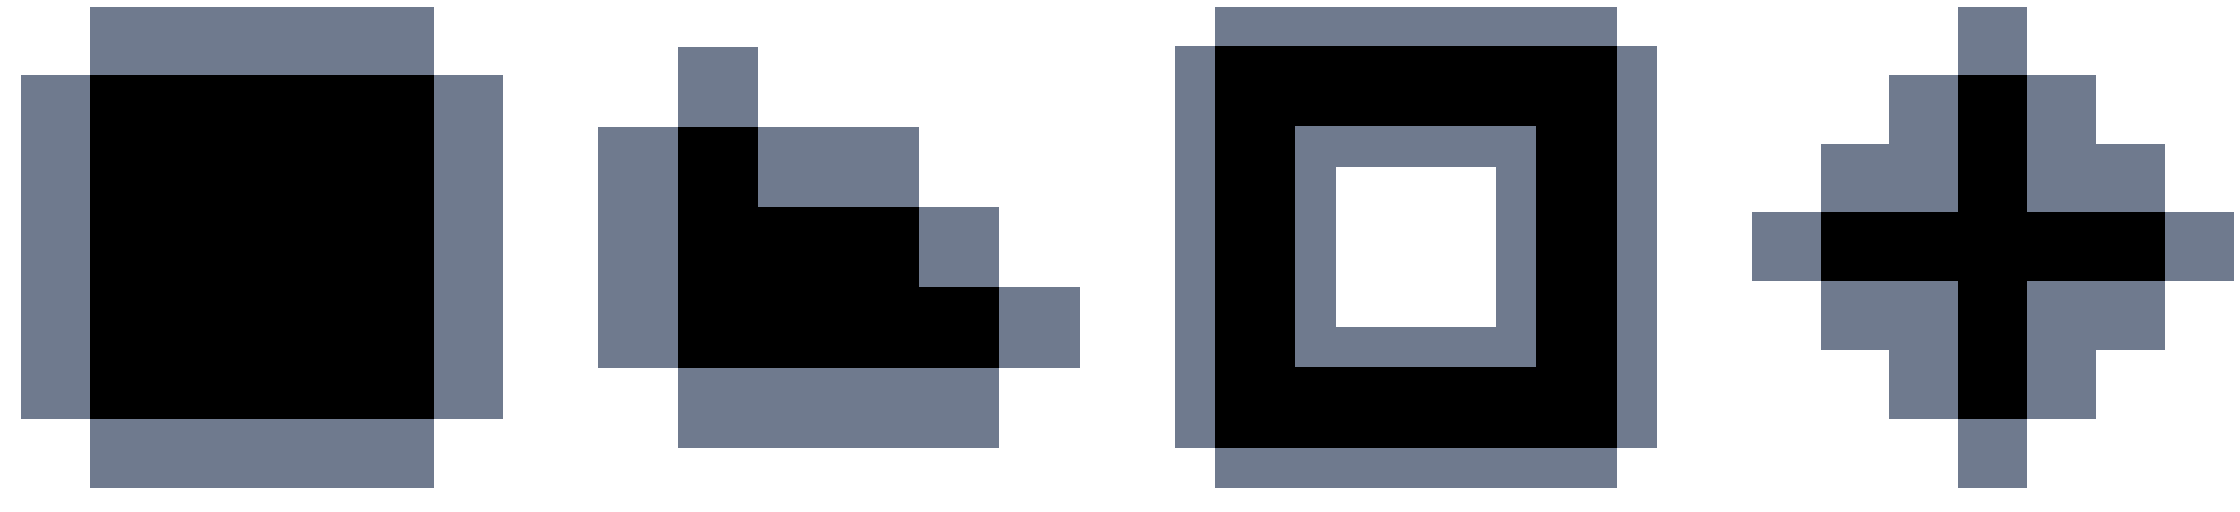

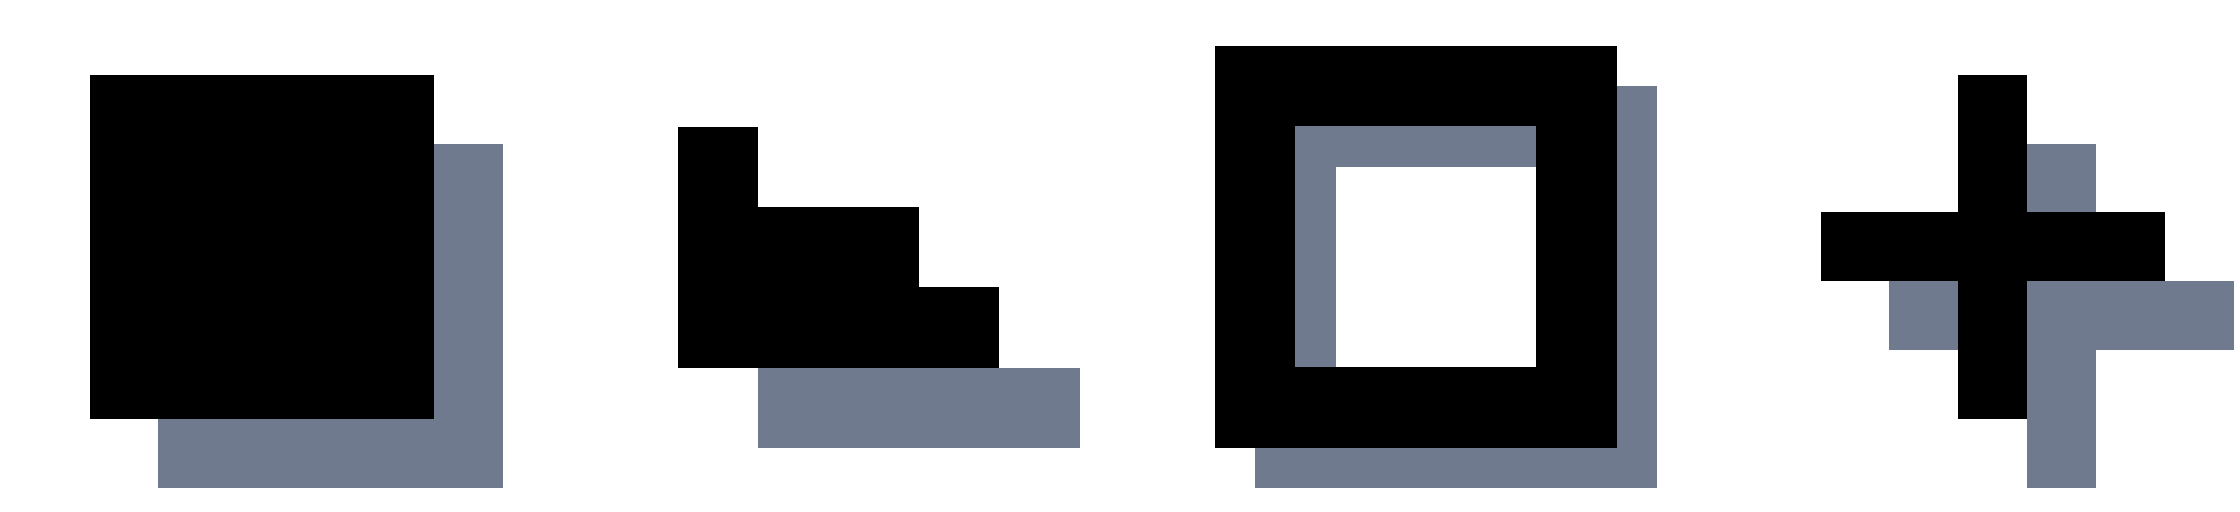

In [145]:
for i in range(5):
    plt.figure(figsize=(50,10))
    
    color = 'bone_r'
    plt.subplot(151)
    plt.imshow(dilated_square[i]+square, cmap=color)
    plt.axis('off')
    
    plt.subplot(152)
    plt.imshow(dilated_triangle[i]+triangle, cmap=color)
    plt.axis('off')

    plt.subplot(153)
    plt.imshow(dilated_box[i]+box, cmap=color)
    plt.axis('off')
    
    plt.subplot(154)
    plt.imshow(dilated_cross[i]+cross, cmap=color)
    plt.axis('off')
    
    #if i==0 or i==1 or i==2:
    #    plt.subplot(155)
    #    plt.imshow(solist[i], cmap='gray')
    #    plt.axis('off')
    #else:
    #    plt.subplot(155)
    #    plt.imshow(solist[i], cmap=color)
    #    plt.axis('off')
    
    plt.savefig('dilation' +str(i)+'.png', bbox_inches = 'tight')
    plt.show()

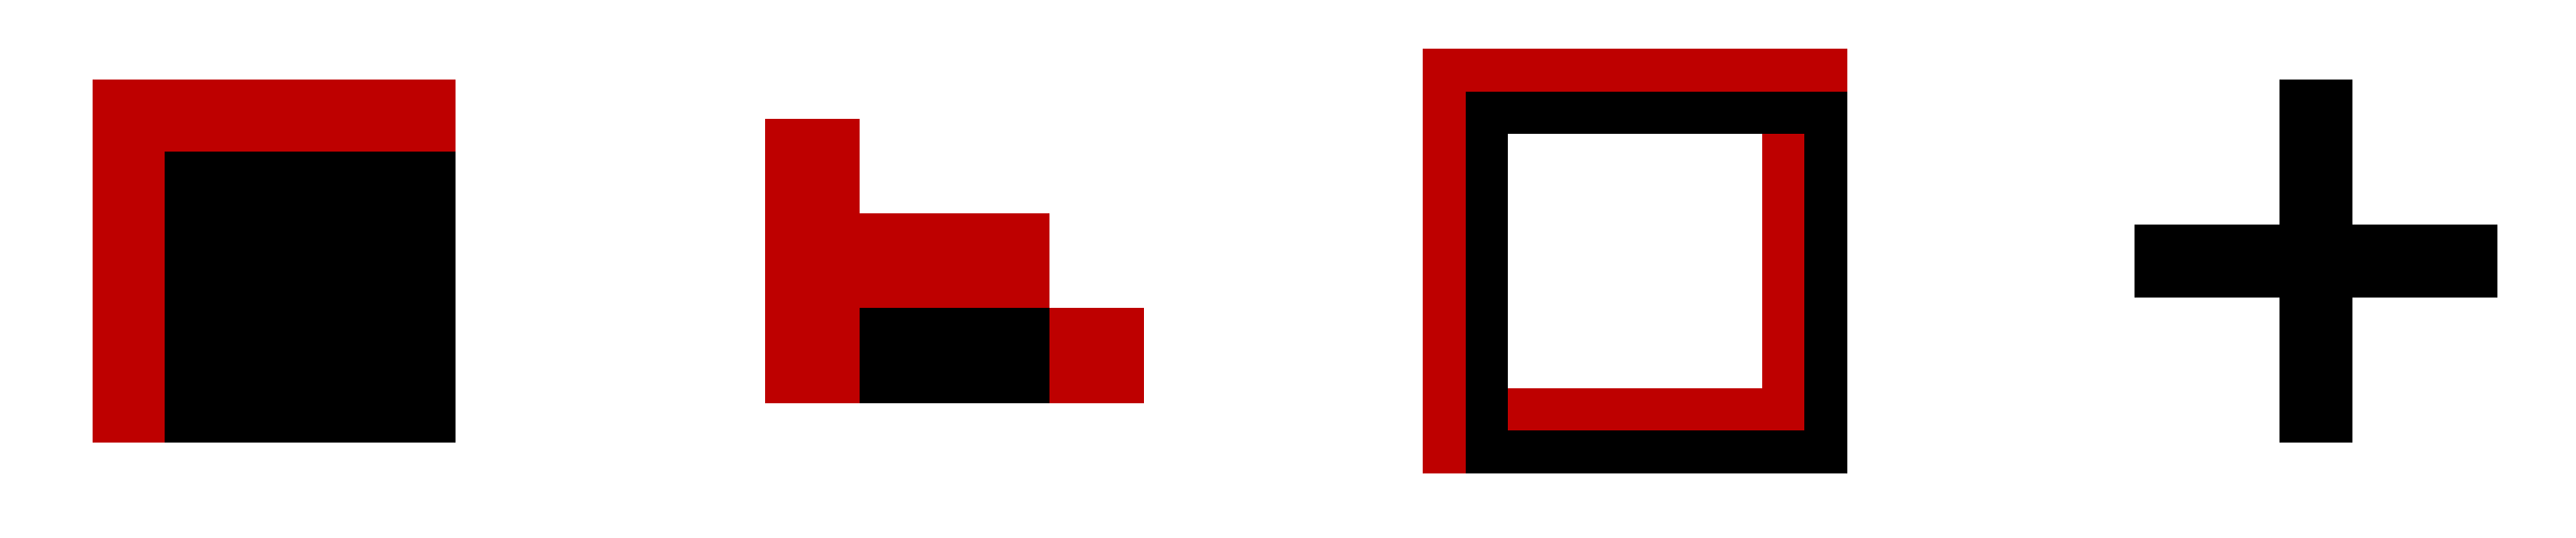

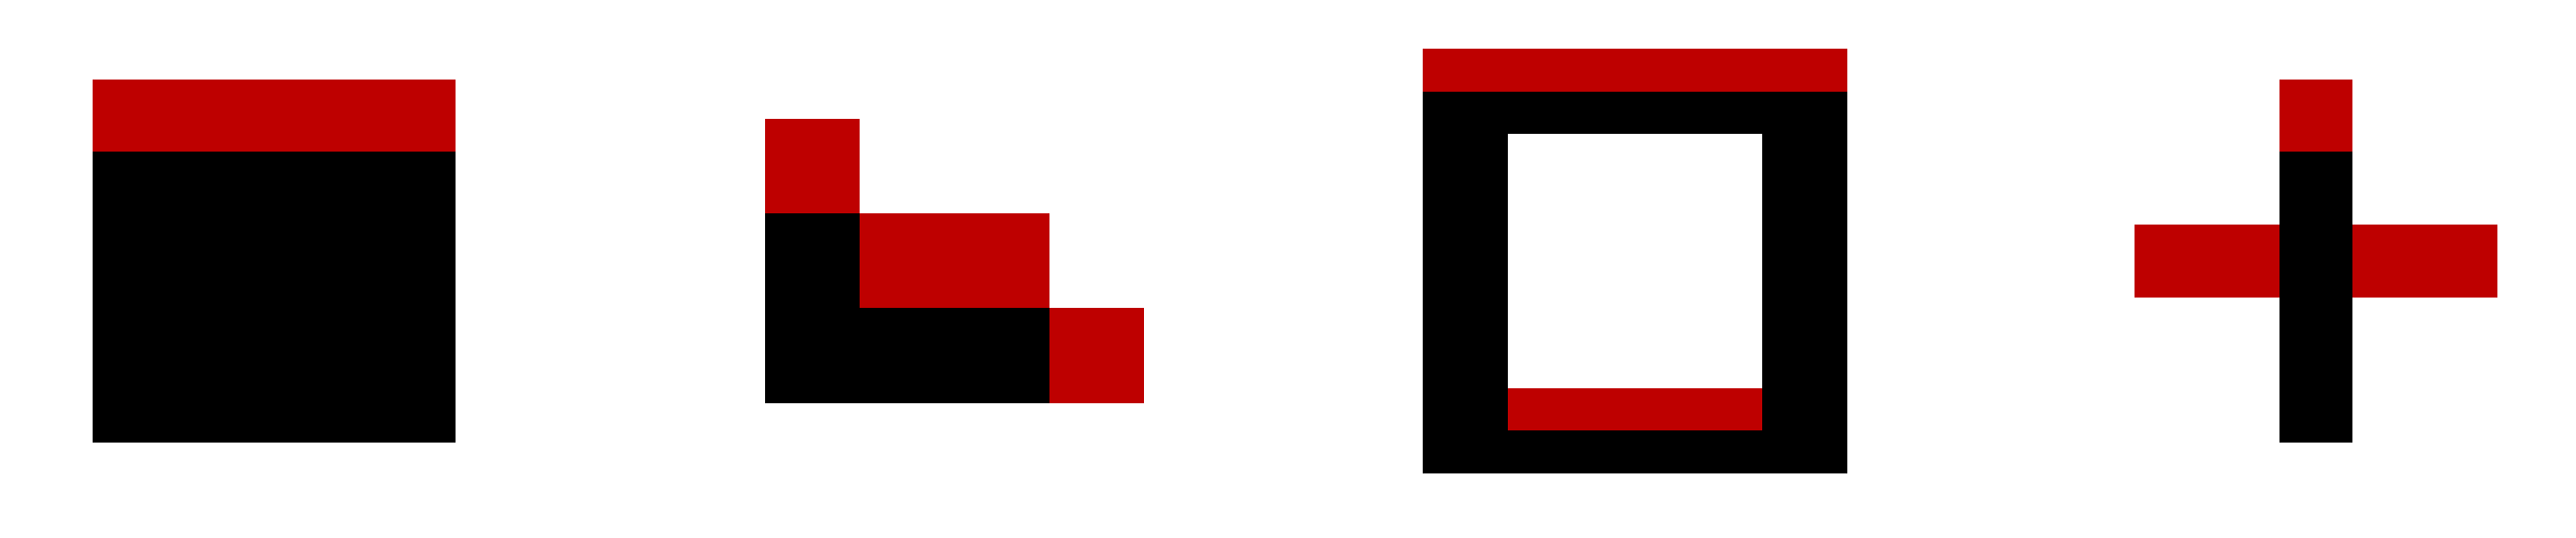

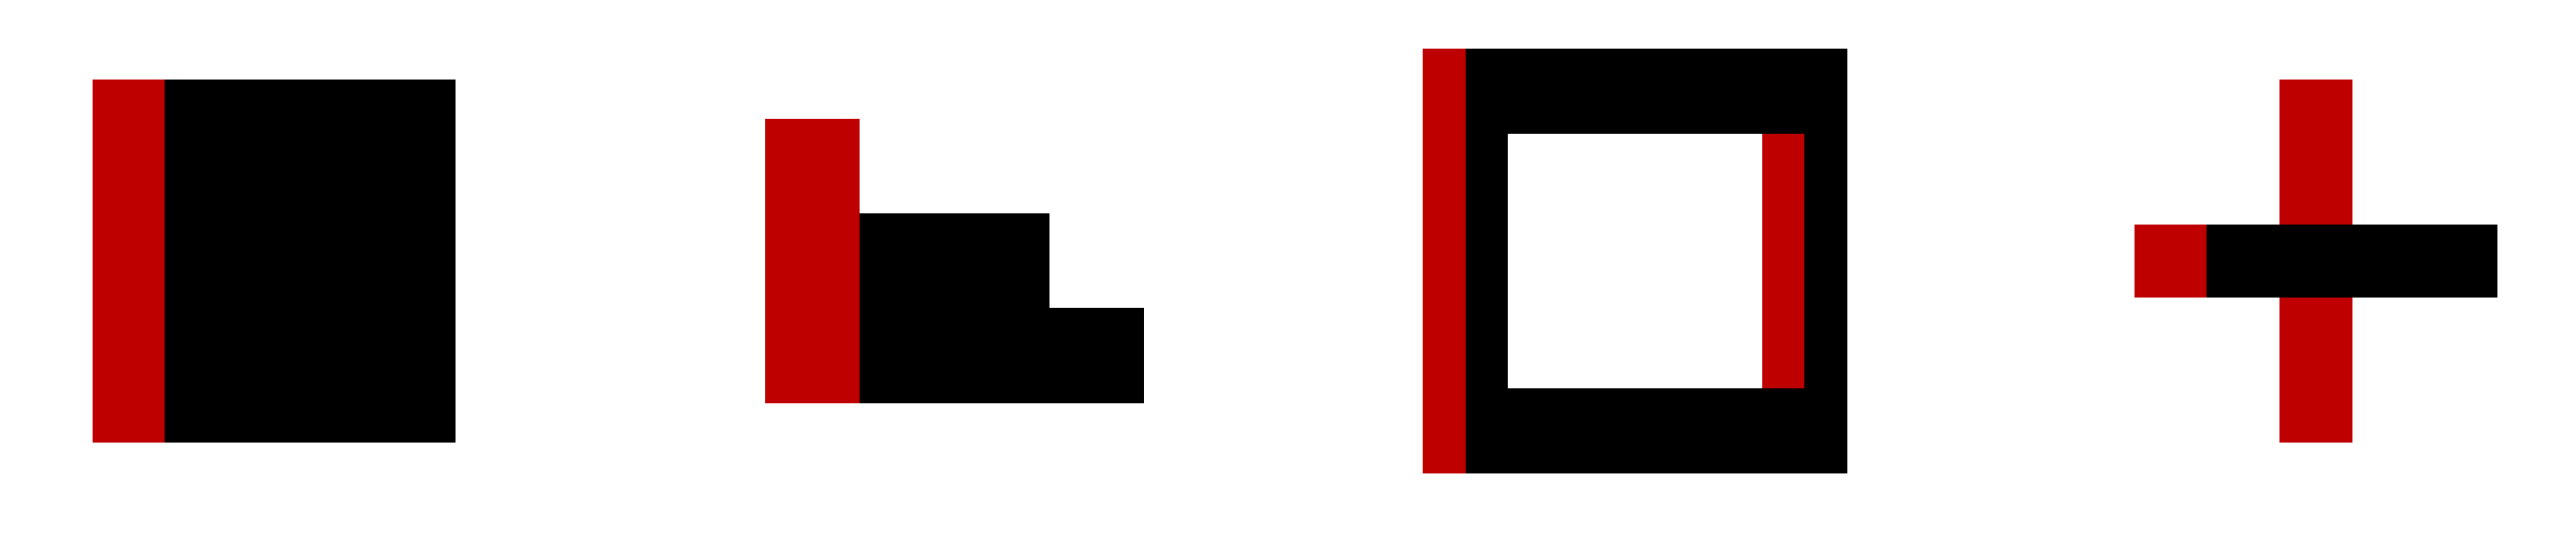

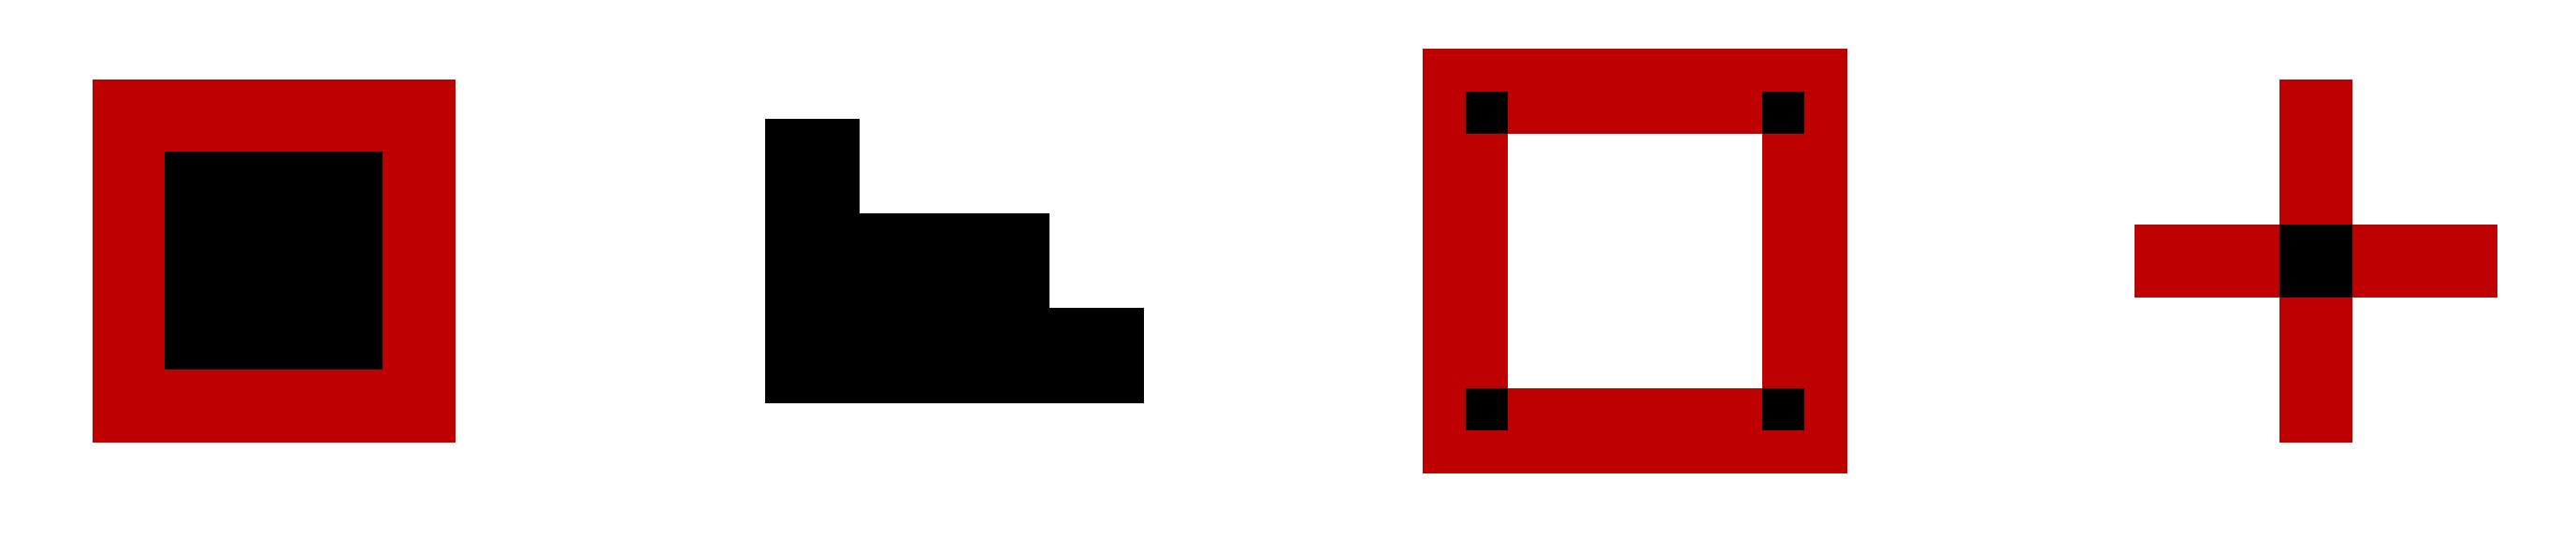

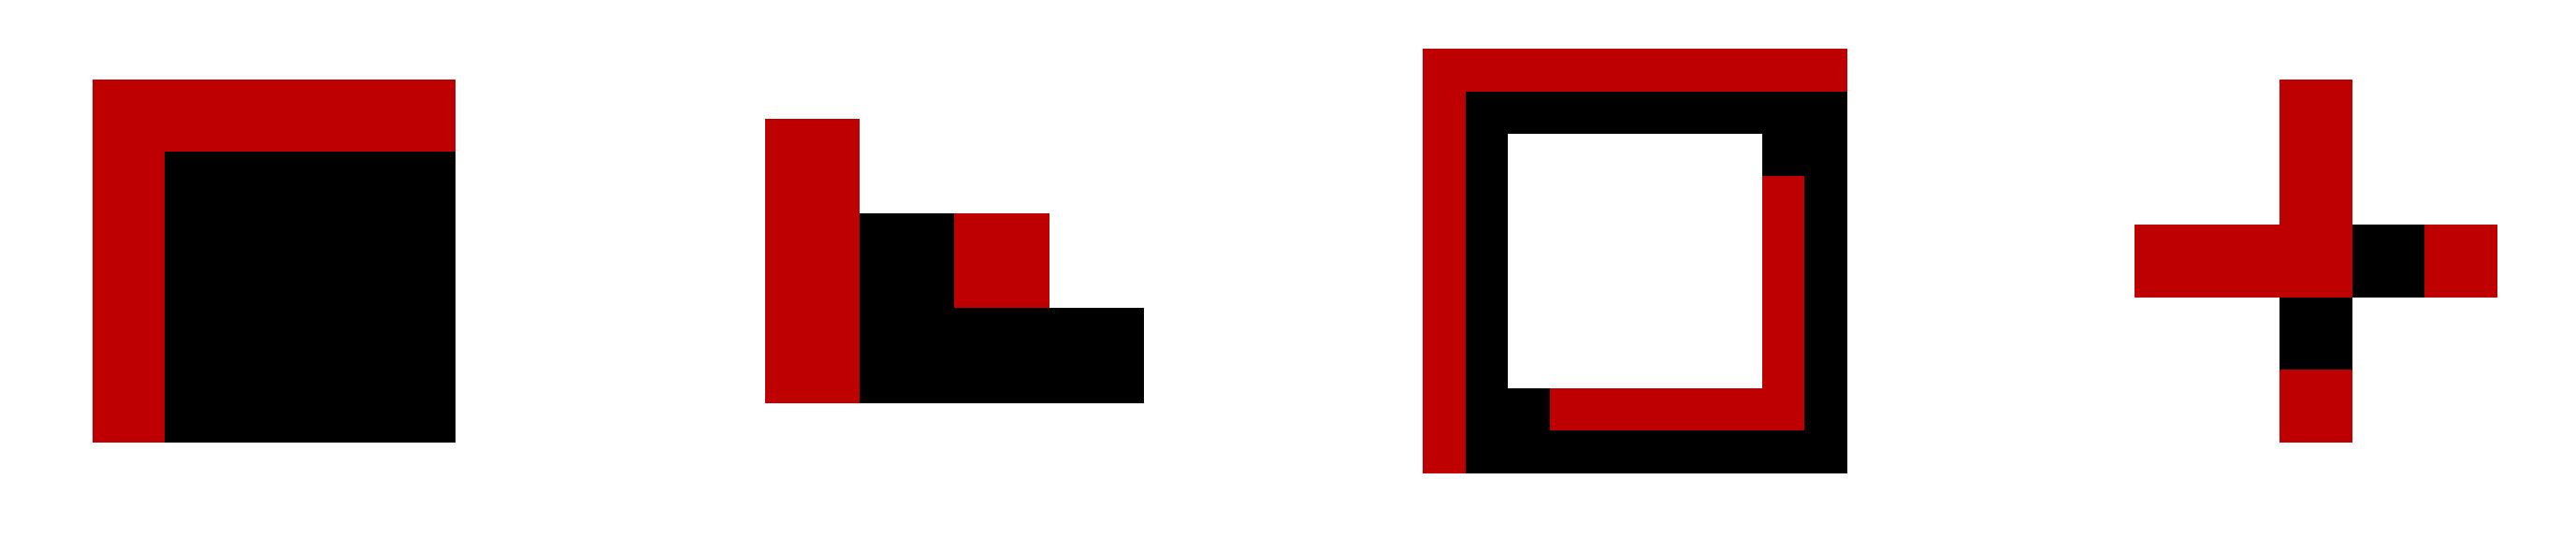

In [152]:
for i in range(5):
    plt.figure(figsize=(50,10))
    
    color = 'gist_heat_r'
    plt.subplot(141)
    plt.imshow(eroded_square[i]+square, cmap=color)
    plt.axis('off')
    
    plt.subplot(142)
    plt.imshow(eroded_triangle[i]+triangle, cmap=color)
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(eroded_box[i]+box, cmap=color)
    plt.axis('off')
    
    if i==0:
        plt.subplot(144)
        plt.imshow(eroded_cross[i]+cross+1, cmap='gist_heat_r')
        plt.axis('off')
    if i!=0:
        plt.subplot(144)
        plt.imshow(eroded_cross[i]+cross, cmap=color)
        plt.axis('off')
    
    #if i==0 or i==1 or i==2:
    #    plt.subplot(155)
    #    plt.imshow(solist[i], cmap='gray')
    #    plt.axis('off')
    #else:
    #    plt.subplot(155)
    #    plt.imshow(solist[i], cmap=color)
    #    plt.axis('off')
    
    plt.savefig('erosion' +str(i)+'.png', bbox_inches = 'tight')
    plt.show()

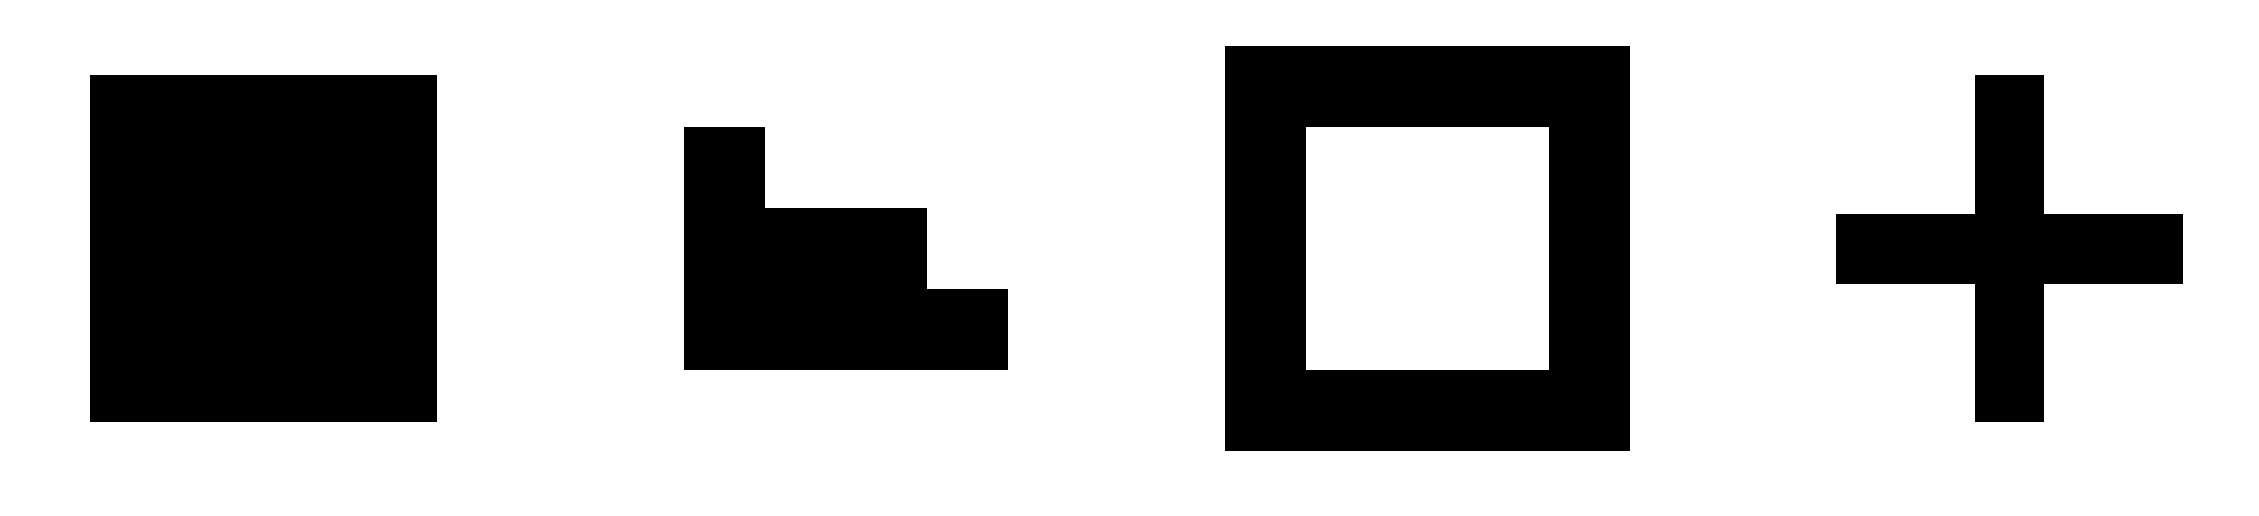

In [146]:
plt.figure(figsize=[40,10])

plt.subplot(141)
plt.imshow(square, cmap='gray_r')
plt.axis('off')
plt.subplot(142)
plt.imshow(triangle, cmap='gray_r')
plt.axis('off')
plt.subplot(143)
plt.imshow(box, cmap='gray_r')
plt.axis('off')
plt.subplot(144)
plt.imshow(cross, cmap='gray_r')
plt.axis('off')

plt.savefig('original_image.png', bbox_inches='')
plt.show()

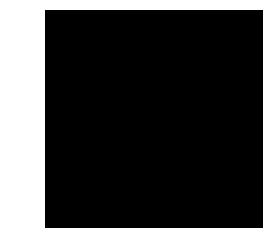

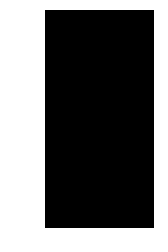

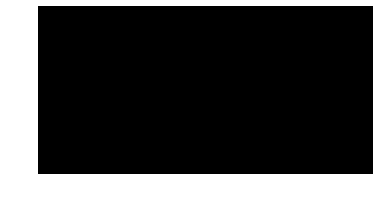

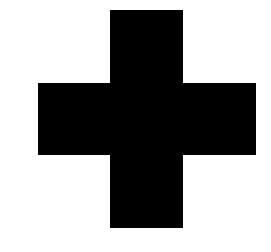

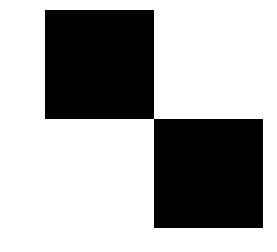

In [147]:
for i in range(5):
    if i==0 or i==1 or i==2:
        plt.imshow(solist[i], cmap='gray')
        plt.axis('off')
    else:
        plt.imshow(solist[i], cmap=color)
        plt.axis('off')
        
    plt.savefig(str(i) + '.png', bbox_inches='tight')
    plt.show()